<a href="https://colab.research.google.com/github/RahulKumarSahDepp/Share-Price-Forecasting-Using-Facebook-Prophet/blob/main/Share_Price_Forecasting_Using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

**Share price forecasting** uses historical data, economic indicators, and sentiment analysis to **predict future stock prices**. Traditional methods include statistical and regression analysis, while modern techniques leverage **machine learning and deep learning models like CNNs and LSTMs to analyze complex, non-linear patterns for more sophisticated predictions**.
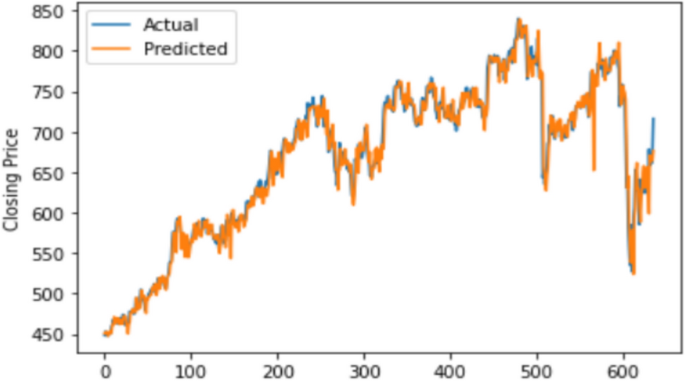

How Prophet Works:

Facebook Prophet using Additive Regressive models using the following four components:

- **y(t) = g(t) + s(t) + h(t) + \epsilon_t**

  - g(t): A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting change points from the data.
  - s(t): A yearly seasonal component modeled using the Fourier series and weekly seasonal component using dummy variable
  - h(t): A user-provided list of important holidays.
  - epsilon_t:  Error term used by the prophet.

## **Importing Libraries**

In [1]:
!pip install prophet==1.2.1 cmdstanpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use("fivethirtyeight")

## **Loading the Dataset**

In [2]:
df = pd.read_csv("/content/Share-Price-Forecasting-Using-Facebook-Prophet---Dataset.csv")

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-27,15.315000,15.5120,15.131500,15.337500,15.337500,58406000
1,2015-01-28,15.490500,15.5755,15.190000,15.195500,15.195500,61276000
2,2015-01-29,15.236500,15.6400,14.966500,15.589000,15.589000,173132000
3,2015-01-30,17.316000,17.9750,17.037001,17.726500,17.726500,477122000
4,2015-02-02,17.502501,18.2500,17.500500,18.223499,18.223499,204638000


- Since the data is required in a prophet in the form of two columns first Date named as 'ds' and Ajd close as 'y

In [4]:
df[['ds' , 'y']] = df[['Date', 'Adj Close']]

In [5]:
df = df[['ds' , 'y']]

In [6]:
df.head(5)

,ds,y
0,2015-01-27,15.337500
1,2015-01-28,15.195500
2,2015-01-29,15.589000
3,2015-01-30,17.726500
4,2015-02-02,18.223499


- Now, we will be splitting the dataset into train and test. ANd for trainig purpose we will use four years of data and one year of data for testing purpose

In [26]:
# split data frame  into two parts train and test
split_date = "2021-11-04"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

In [27]:
df_test.head()

,ds,y
1708,2021-11-05,175.949493
1709,2021-11-08,174.449005
1710,2021-11-09,178.811493
1711,2021-11-10,174.102493
1712,2021-11-11,173.625000


In [28]:
df_train.head()

,ds,y
0,2015-01-27,15.337500
1,2015-01-28,15.195500
2,2015-01-29,15.589000
3,2015-01-30,17.726500
4,2015-02-02,18.223499


Now, we initiate the facebook prophet API, this works similar to  sk-learn.

In [29]:
model = Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
print(df_test.shape)
print(df_test.head())


(431, 2)
              ds           y
1708  2021-11-05  175.949493
1709  2021-11-08  174.449005
1710  2021-11-09  178.811493
1711  2021-11-10  174.102493
1712  2021-11-11  173.625000


In [33]:
forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
426,2023-07-20,202.449219,119.238709,302.740047,113.410963,296.916380,5.375997,5.375997,5.375997,0.538337,0.538337,0.538337,4.837661,4.837661,4.837661,0.0,0.0,0.0,207.825216
427,2023-07-21,202.496704,117.238933,302.163605,113.206035,297.186426,5.085458,5.085458,5.085458,0.292754,0.292754,0.292754,4.792703,4.792703,4.792703,0.0,0.0,0.0,207.582162
428,2023-07-24,202.639161,116.664712,304.235203,113.096078,297.455668,4.729571,4.729571,4.729571,0.264290,0.264290,0.264290,4.465281,4.465281,4.465281,0.0,0.0,0.0,207.368732
429,2023-07-25,202.686647,118.128715,303.727469,112.923910,297.620347,4.791617,4.791617,4.791617,0.493523,0.493523,0.493523,4.298093,4.298093,4.298093,0.0,0.0,0.0,207.478263
430,2023-07-26,202.734133,118.099979,304.356109,112.775358,297.785025,4.663457,4.663457,4.663457,0.557212,0.557212,0.557212,4.106245,4.106245,4.106245,0.0,0.0,0.0,207.397590


- As we can see this column contains the date column, predict share price (y_hat), lower and upper estimates of it, trend components, seasonal components (weekly and yearly).


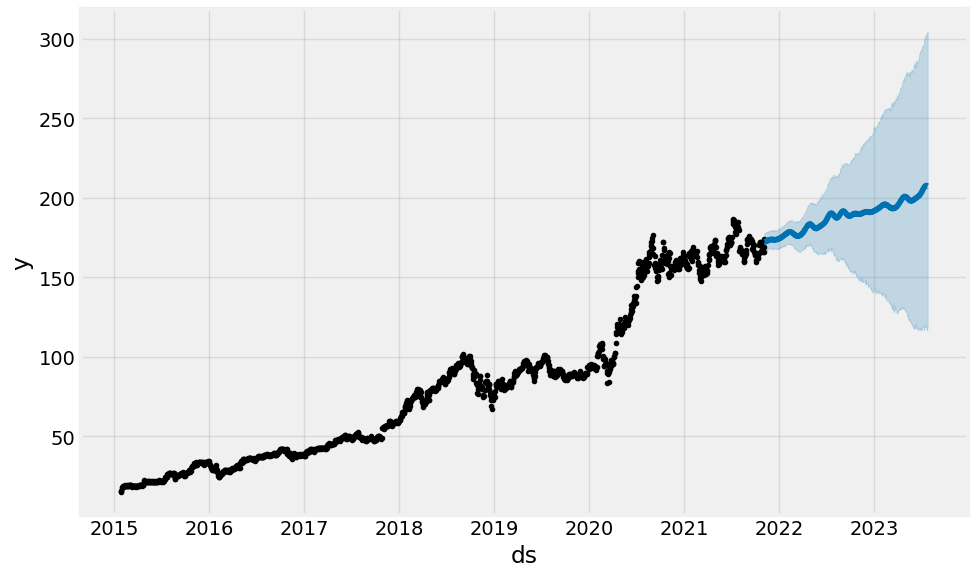

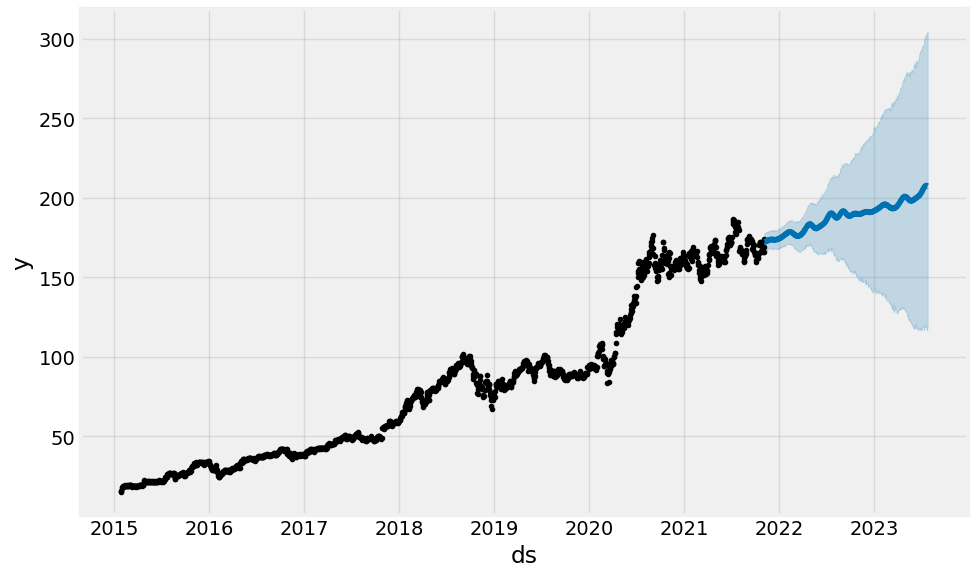

In [34]:
model.plot(forecast)

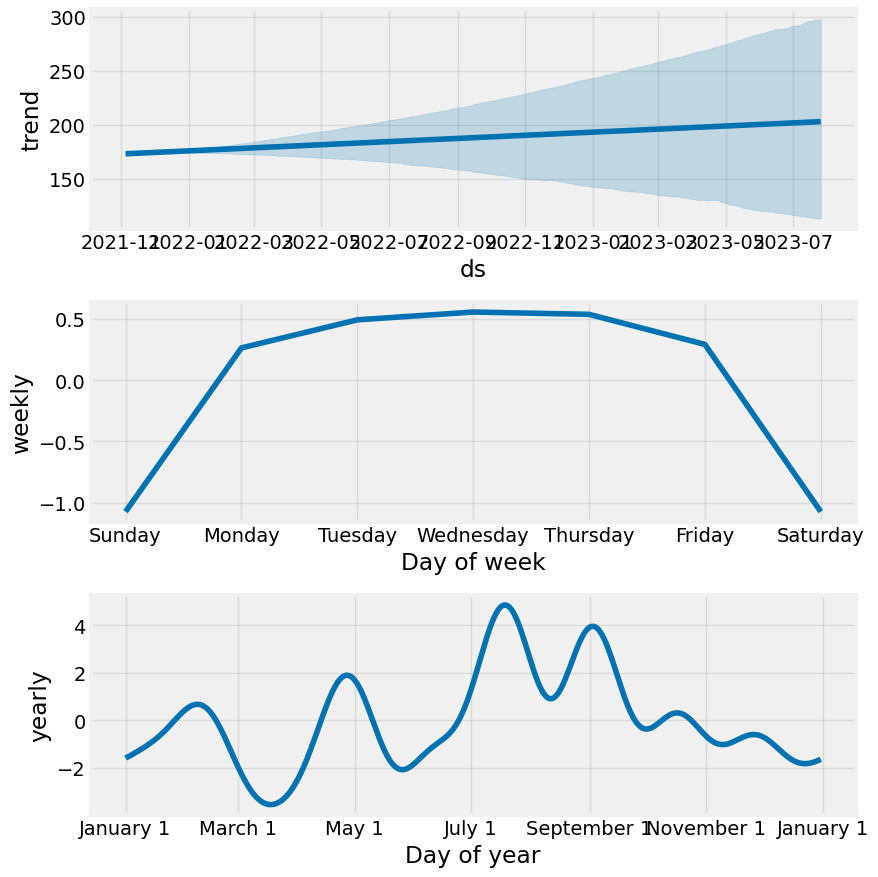

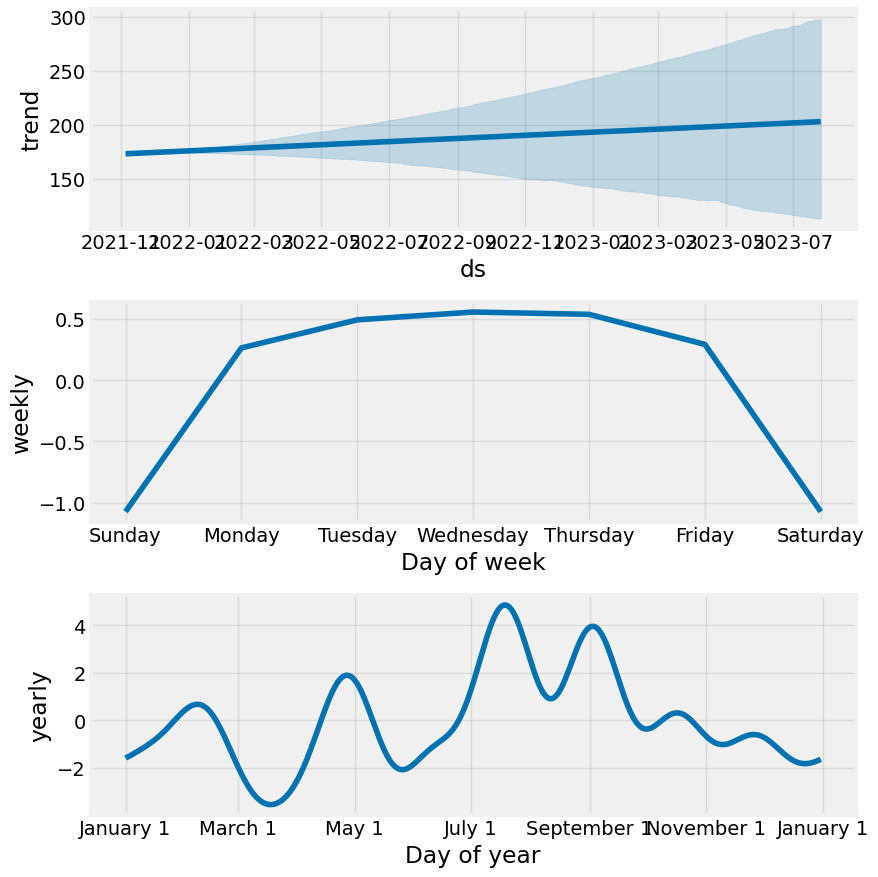

In [35]:
model.plot_components(forecast)

## **Evaluation of the Model**

In [36]:
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

Mean Squared Error (MSE): 5129.49913373872
Mean Absolute Error (MAE): 63.796115963694604


In [37]:
def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

Mean Absolute % Error (MAPE):  58.74099001799515
